<a href="https://colab.research.google.com/github/rama100/python-notebooks/blob/main/add_color_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to add color to your boring text output in Jupyter/Colab (and build a token visualizer too!)

**Author**: [Rama Ramakrishnan](http://ramakrishnan.com)

## Intro

I don't know about you but text outputs from *my* code are usually pretty boring. Well, I got a bit fed up with this recently and looked into how to make them less boring. Turns out all we need is a very basic `HTML`tag and simple code. 

This has proved to be very useful. In particular, I have found this to be particularly helpful when I am working with **text output from an LLM and want to highlight different parts of the text**.

Let me show you how.

## Intuition

The basic approach is super simple.

We import a couple of helper functions that Jupyter uses to print out HTML. This is a one-time thing you do at the top of the notebook (like you would do with `numpy` or `pandas`).

`from IPython.display import display, HTML`

For any text that we want to make colorful:
1. Write code to (a) put the words you want to display nicely in an HTML `<span>` tag (b) "style" the tag with the right color, font etc (don't worry if this stuff doesn't make sense - the examples below will make it clear).

2. Ask Jupyter to render the output as HTML.

That's it.

(BTW, if you are curious, you can read about the `<span>` tag [here](https://www.w3schools.com/tags/tag_span.asp)) 


## Examples

OK, let's get the import out of the way.

In [180]:
from IPython.display import display, HTML

### Example #1

Consider the sentence *"To err is human"*.

I will print the boring version first.

In [181]:
text = "To err is human"

print(text)

To err is human


How about we give a different color to each word?

In [182]:
text  = ("<span style='color: blue'>To </span>"
         "<span style='color: black'>err </span>"
         "<span style='color: green'>is </span>"
         "<span style='color: red'>human.</span>")

Things to note:
- We construct a string one word at a time.
- We place each word between `<span>` and `</span>` tags. BTW, it doesn't have to be just a single word. You can place a whole sentence inside the span tag if you want.
- The `style=...` attribute of each span tag is where the magic happens. This is where we set the color and other formatting we want to do.

Next, we tell Jupyter to print this string out as HTML.

In [183]:
display(HTML(text))

Simple, right?

---
Apart from changing the color, you can change the formatting in many ways.

I asked ChatGPT what formatting choices are available and here's the loooooong [response](https://chatgpt.com/share/68001aad-15dc-8009-b9ff-d5f60cab54a1).

Here's a screenshot of just part of ChatGPT's response:

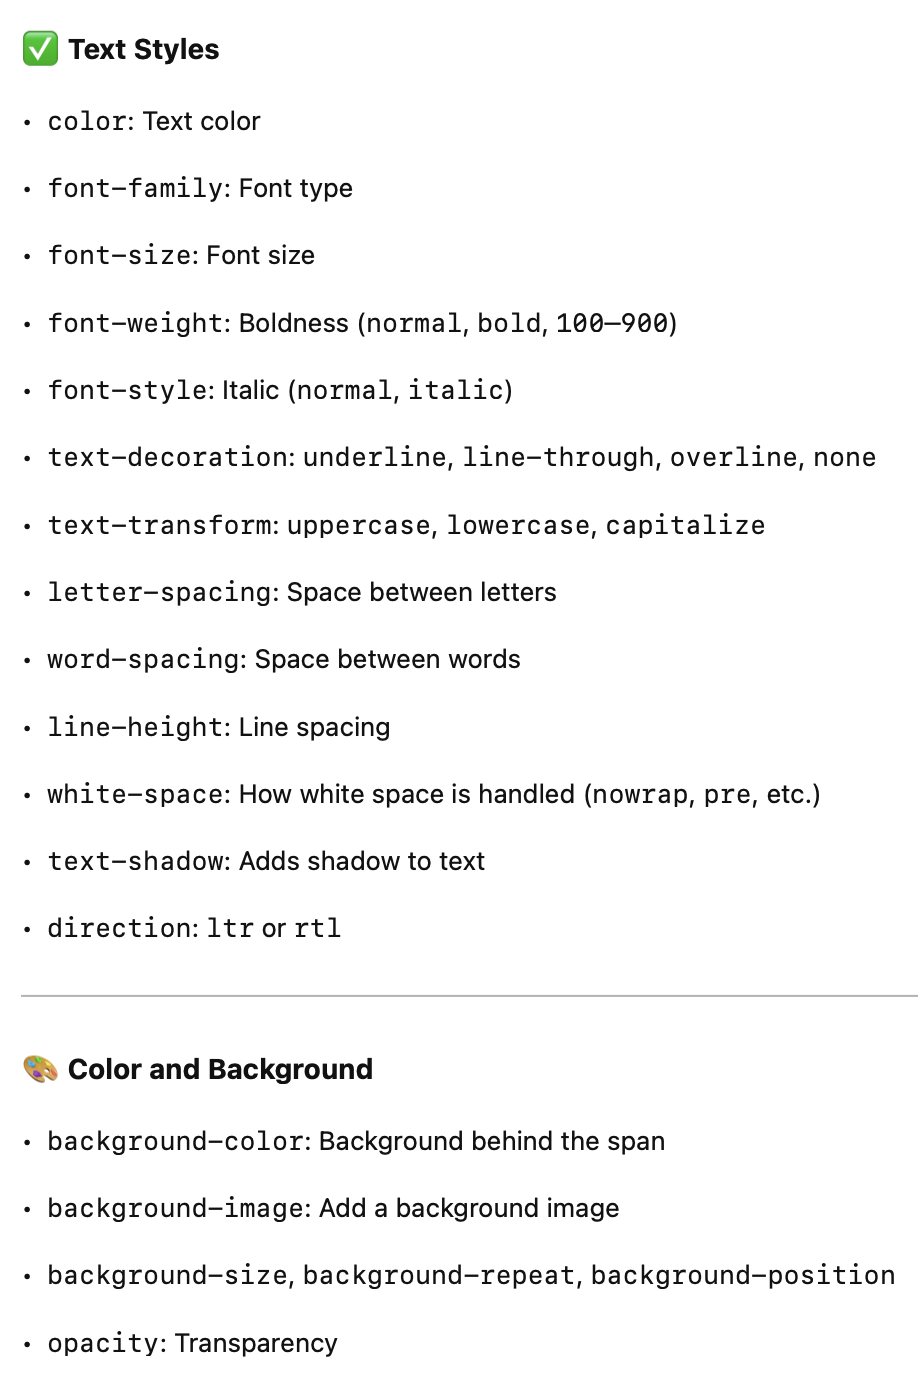

---
Just for fun, let's 
- italicise "To"
- change "err" to white on a black background
- make "is" bold
- underline "human"

In [184]:
text  = ("<span style='color: blue; font-style: italic'>To </span>"
         "<span style='color: white; background-color: black'>err</span>"
         "<span style='color: green; font-weight: bold'> is </span>"
         "<span style='color: red; text-decoration: underline'>human.</span>")

In [185]:
display(HTML(text))

Yikes, this looks ugly, sorry. Anyway, I just wanted to convey how easy it is to change the formatting.

## Example 2

Let's look at a quick example to show how to do this **dynamically** with code.

We will work with Abraham Lincoln's famous [Gettysburg Address](https://www.abrahamlincolnonline.org/lincoln/speeches/gettysburg.htm).

In [186]:
ga = """Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal.

Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this.

But, in a larger sense, we can not dedicate -- we can not consecrate -- we can not hallow -- this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the great task remaining before us -- that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion -- that we here highly resolve that these dead shall not have died in vain -- that this nation, under God, shall have a new birth of freedom -- and that government of the people, by the people, for the people, shall not perish from the earth."""

Let's print this out.

In [187]:
print(ga)

Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal.

Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this.

But, in a larger sense, we can not dedicate -- we can not consecrate -- we can not hallow -- this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have t

---
**Just for fun, we will highlight in yellow only the words that have more than 5 letters.**

We first split the gettyburg address into a list of words.

In [188]:
words = ga.replace("\n"," <br> ").split()  

(Minor detail: I first replace the newlines with the HTML `<br>` tag so that when I later print this out as HTML, I will get three paragraphs like the original instead of one long paragraph. To see what I mean, run `words = ga.split()` rather than the line above and see how the output below changes).

Next, we will create a string by looping through each word and highlighting only the long words.

In [189]:
text = ""
for word in words:
    if len(word) > 5:                                                       # if the word has more than 5 characters 
        text += f"<span style='background-color: yellow'>{word} </span>"    # highlight it
    else:
        text += f"{word} "                                                  # otherwise, leave it as is

Notice how we used `f-strings` to dynamically insert words into `text`.

In [190]:
# print it as HTML
display(HTML(text))

---
Easy, right?

Because we are doing things dynamically with code (a.k.a "programmatically"), we have lots of flexibility.

So, let's kick things up a notch :-).

## Bonus Example: Let's code up a token visualizer!!

If you have been working with LLMs, you may know that the text we feed into the LLM gets **tokenized** into "sub words". These could be full words, individual characters or parts of words. For example, if you feed the string "Rama Ramakrishnan" into one of the OpenAI GPT models, it will get tokenized as:

```['R', 'ama', ' Ram', 'ak', 'rish', 'nan']```

There are many sites out there that show this in a nice, visual way. If I plug in "Rama Ramakrishnan" into [this site ](https://observablehq.com/@simonw/gpt-tokenizer), for example, I get:

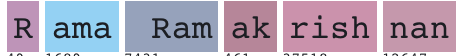



Pretty, right?

**Given our newly-acquired ability to format text, how about we quickly build a token visualizer ourselves??**

Let's do this!

We need to do two things:
1. Tokenize the input string into individual tokens
2. Colorize the tokens and display them

For the first step, I used the `tiktoken` Python package to write a little function called `tokenize`. Since tokenization is not the focus of this notebook, I won't go through this function in detail (of course, if you are curious, feel free to paste the function into an LLM and ask for an explanation).

In [ ]:
!pip install tiktoken # one-time install

In [191]:
import tiktoken

def tokenize(text, model_name="gpt-4"):
    """
    Tokenize a string into a list of tokens

    Args:
        text: Input text to tokenize.
        model_name: Which model's tokenizer do we want to use (e.g., "gpt-4", "gpt-3.5-turbo").

    Returns:
        A list of token strings.
    """
    tokenizer = tiktoken.encoding_for_model(model_name)
    token_ids = tokenizer.encode(text)
    token_strings = [tokenizer.decode_single_token_bytes(tok).decode("utf-8", errors="replace")
                     for tok in token_ids]
    return token_strings

OK, let's see if it works.

In [192]:
tokens = tokenize("Rama Ramakrishnan")
tokens

['R', 'ama', ' Ram', 'ak', 'rish', 'nan']

Perfect! Let's go to Step 2 and colorize these tokens!

I will first create a list of colors to use.

In [193]:
colors = ['lightpink', 'lightgreen', 'lightblue', 'yellow']

I will loop through each token and set its background color inside the `<span>` tag. **I will simply cycle through the list of 4 colors repeatedly.**

In [194]:
text = ""

color_index = 0
for token in tokens:                                       
    text += f"<span style='background-color: {colors[color_index]}'>{token}</span>"   
    color_index += 1          
    color_index = color_index % len(colors)  

OK, showtime. Let's see if it worked.

In [195]:
display(HTML(text))

Yay!

OK, let's apply this to the full Gettyburg Address!

In [196]:
tokens = tokenize(ga)

text = ""

color_index = 0
for token in tokens:                                       
    text += f"<span style='background-color: {colors[color_index]}'>{token}</span>"   
    color_index += 1          
    color_index = color_index % len(colors)  

display(HTML(text))

Beautiful!! 🚀 (even if I say so myself 🙂)

---
That's all. I hope you found this useful. Have fun with it!

---